# Check LAVIS dataset zoo

In [21]:
from lavis.datasets.builders import dataset_zoo

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [22]:
dataset_names = dataset_zoo.get_names()
print(len(dataset_names))
print(*dataset_names, sep='\n')

104
aok_vqa
aok_vqa_instruct
audio_video_discrn
audiocaps_mm_caption
audiocaps_mm_caption_instruct
audiocaps_mm_qa
audioset_mm_caption
audioset_mm_caption_instruct
avsd_dialogue
avsd_mm_dialogue_instruct
blip_diffusion_finetune
capfilt14m
capfilt14m_instruct
charade_caption
charade_caption_instruct
clotho_qa
clothov2
clothov2_instruct
coco_caption
coco_caption_instruct
coco_retrieval
coco_vqa
coco_vqa_instruct
coin_caption
coin_caption_instruct
conceptual_caption_12m
conceptual_caption_12m_instruct
conceptual_caption_3m
conceptual_caption_3m_instruct
didemo_retrieval
esc50_cls
flickr30k
flickr30k_caption
flickr30k_caption_instruct
gqa
gqa_instruct
iconqa
iconqa_instruct
image_pc_discrn
imagenet
laion2B_multi
laion400M
laion400M_instruct
llava150k_dialogue_instruct
modelnet40_cls
msrvtt_caption
msrvtt_caption_instruct
msrvtt_qa
msrvtt_qa_instruct
msrvtt_retrieval
msvd_caption
msvd_caption_instruct
msvd_qa
msvd_qa_instruct
musicavqa_mm
musicavqa_mm_instruct
nlvr
nocaps
objaverse_mm_capti

# Configure COCO caption dataset

In [23]:
from lavis.datasets.builders import load_dataset
COCO_PATH = "/root/data/coco_caption"
coco_dataset = load_dataset("coco_caption")

WARNING - 2024-02-19 19:34:36,776 - warnings - /root/dev/LAVIS/lavis/datasets/builders/base_dataset_builder.py:164: UserWarning: 
                The specified path /export/home/.cache/lavis/coco/images/ for visual inputs does not exist.
                Please provide a correct path to the visual inputs or
                refer to datasets/download_scripts/README.md for downloading instructions.
                
  warnings.warn(

INFO - 2024-02-19 19:34:36,777 - base_dataset_builder - Building datasets...
WARNING - 2024-02-19 19:34:36,778 - warnings - /root/dev/LAVIS/lavis/datasets/builders/base_dataset_builder.py:224: UserWarning: storage path /export/home/.cache/lavis/coco/images/ does not exist.
  warnings.warn("storage path {} does not exist.".format(vis_path))



Using downloaded and verified file: /export/home/.cache/lavis/coco/annotations/coco_karpathy_train.json
Using downloaded and verified file: /export/home/.cache/lavis/coco/annotations/coco_karpathy_val.json
Using downloaded and verified file: /export/home/.cache/lavis/coco/annotations/coco_karpathy_test.json


In [24]:
# train, val, test
print(coco_dataset.keys())
# 566747
print(len(coco_dataset["train"]))
# 0~4 idx data have same 'image', 'image_id' and different 'text_input'
print(coco_dataset["train"][5])

dict_keys(['train', 'val', 'test'])
566747
None


In [25]:
coco_dataset = load_dataset("coco_caption", vis_path=COCO_PATH)

INFO - 2024-02-19 19:34:37,785 - base_dataset_builder - Building datasets...


Using downloaded and verified file: /export/home/.cache/lavis/coco/annotations/coco_karpathy_train.json
Using downloaded and verified file: /export/home/.cache/lavis/coco/annotations/coco_karpathy_val.json
Using downloaded and verified file: /export/home/.cache/lavis/coco/annotations/coco_karpathy_test.json


In [26]:
# train, val, test
print(coco_dataset.keys())
# 566747
print(len(coco_dataset["train"]))
# 0~4 idx data have same 'image', 'image_id' and different 'text_input'
print(coco_dataset["train"][5])

dict_keys(['train', 'val', 'test'])
566747
{'image': <PIL.Image.Image image mode=RGB size=556x640 at 0x7F4BD3394670>, 'text_input': 'A young boy standing in front of a computer keyboard.', 'image_id': 'coco_318219'}


In [27]:
# Check annotation json file structure
import json

coco_annotation = {}
for split in ["train", "val", "test"]:
    with open(f"/export/home/.cache/lavis/coco/annotations/coco_karpathy_{split}.json", "r") as f:
        coco_annotation[split] = json.load(f)

print(type(coco_annotation["train"]))
print(len(coco_annotation["train"]))
print(len(coco_annotation["val"]))
print(len(coco_annotation["test"]))
# print(*coco_karpathy_train, sep="\n")

<class 'list'>
566747
5000
5000


In [28]:
print(coco_annotation["train"][0].keys())
print(coco_annotation["train"][0])

dict_keys(['caption', 'image', 'image_id'])
{'caption': 'A woman wearing a net on her head cutting a cake. ', 'image': 'val2014/COCO_val2014_000000522418.jpg', 'image_id': 'coco_522418'}


In [29]:
print(coco_annotation["val"][0].keys())
print(coco_annotation["val"][0])

dict_keys(['image', 'caption'])
{'image': 'val2014/COCO_val2014_000000184613.jpg', 'caption': ['A child holding a flowered umbrella and petting a yak.', 'A young man holding an umbrella next to a herd of cattle.', 'a young boy barefoot holding an umbrella touching the horn of a cow', 'A young boy with an umbrella who is touching the horn of a cow.', 'A boy holding an umbrella while standing next to livestock.']}


In [30]:
print(coco_annotation["test"][0].keys())
print(coco_annotation["test"][0])

dict_keys(['image', 'caption'])
{'image': 'val2014/COCO_val2014_000000391895.jpg', 'caption': ['A man with a red helmet on a small moped on a dirt road. ', 'Man riding a motor bike on a dirt road on the countryside.', 'A man riding on the back of a motorcycle.', 'A dirt path with a young person on a motor bike rests to the foreground of a verdant area with a bridge and a background of cloud-wreathed mountains. ', 'A man in a red shirt and a red hat is on a motorcycle on a hill side.']}


# Configure our text2shape dataset

In [31]:
# Load our annotation fine
import os
DATA_PATH = "/root/data/text2shape"

text2shape_annotation = {}
for split in ["train", "val", "test"]:
    with open(os.path.join(DATA_PATH, f"annotations/text2shape_{split}.json"), "r") as f:
        text2shape_annotation[split] = json.load(f)

print(type(text2shape_annotation["train"]))
print(len(text2shape_annotation["train"]))
print(len(text2shape_annotation["val"]))
print(len(text2shape_annotation["test"]))

<class 'list'>
1367240
5720
5740


In [32]:
print(text2shape_annotation["train"][0].keys())
print(text2shape_annotation["train"][0])

dict_keys(['caption', 'image', 'image_id'])
{'caption': 'A low-height round table with three legs.', 'image': '04379243/e758e1b760f185e2593ebeeedbff73b/renderings/r_000_depth0001.png', 'image_id': 'text2shape_04379243_e758e1b760f185e2593ebeeedbff73b_r_000_depth'}


In [33]:
print(text2shape_annotation["val"][0].keys())
print(text2shape_annotation["val"][0])

dict_keys(['caption', 'image'])
{'caption': ['The object is a short hexagon coffee table with 6 legs and two shelves.', 'A hexagonal table with a bottom shelf and six legs.', 'A hexagon-shaped six-legged table with a supporting base.', 'A hexagon-shaped table, with two layers creating a shelf.', 'This is a table in an octagon shape.'], 'image': '04379243/e795845c4e472bfcac4834e2c94f2b9d/renderings/r_000_depth0001.png'}


In [34]:
print(text2shape_annotation["test"][0].keys())
print(text2shape_annotation["test"][0])

dict_keys(['caption', 'image'])
{'caption': ['Square end table with top, drawer and shelf.', 'It looks like an end table with one drawer, a large square top, and a same-size square shelf on the bottom which matches the size of the top.', 'A table in a square shape with one drawer and space for keeping goods between the drawer and the bottom top.', 'A table stands with a flat top.', 'A table with top and drawer.'], 'image': '04379243/594ca5d155b0bdc2c3bd24f986301745/renderings/r_000_depth0001.png'}


In [42]:
# Retreive our dataset from dataset zoo
text2shape_dataset = load_dataset("text2shape")

INFO - 2024-02-19 19:56:38,249 - base_dataset_builder - Using existing file /export/home/.cache/lavis/text2shape/annotations/text2shape_train.json.
INFO - 2024-02-19 19:56:38,252 - base_dataset_builder - Using existing file /export/home/.cache/lavis/text2shape/annotations/text2shape_val.json.
INFO - 2024-02-19 19:56:38,254 - base_dataset_builder - Using existing file /export/home/.cache/lavis/text2shape/annotations/text2shape_test.json.
INFO - 2024-02-19 19:56:38,256 - base_dataset_builder - Building datasets...


In [64]:
# train, val, test
print(text2shape_dataset.keys())
# 566747
print(len(text2shape_dataset["train"]))
# keys: image, text_input, image_id
print(text2shape_dataset["train"][10030])

dict_keys(['train', 'val', 'test'])
1367240
{'image': <PIL.Image.Image image mode=RGB size=600x600 at 0x7F4DF97696D0>, 'text_input': 'A table with covering on the top.', 'image_id': 'text2shape_04379243_1b4e6f9dd22a8c628ef9d976af675b86_r_216_rgb'}


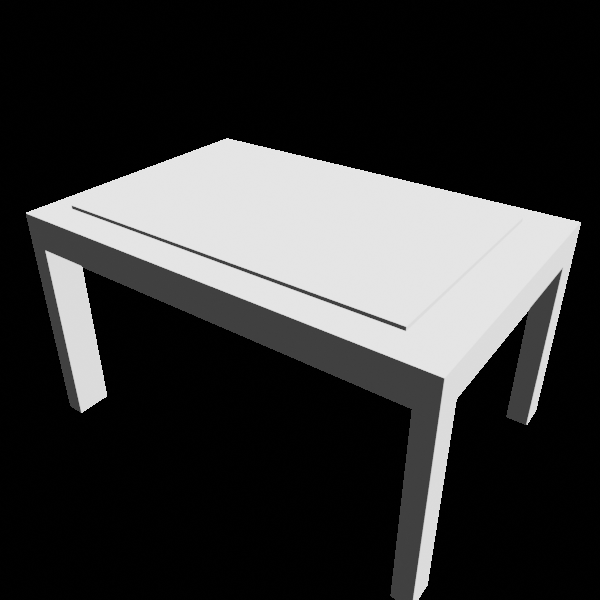

In [65]:
display(text2shape_dataset["train"][10030]["image"])